# 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE


## Data Import

### Import timeseries files from github https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import numpy as np

#Import timeseries files from github https://github.com/CSSEGISandData/COVID-19
#2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

path_confirmed = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
path_deaths =('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
path_recovered =('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

df_conf = pd.read_csv(path_confirmed)
df_death = pd.read_csv(path_deaths)
df_recov = pd.read_csv(path_recovered)


In [2]:
df_conf.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5611,5776,6034,6278,6563,6879,7134,7479,7805,8068,8371,8809,9283,9931,10649,11353,12076,12628,13228,13933,14702,15419,16214,16851,17415,18319,19268,20197,21037,22020,22794,23620,24761,25987,27373,28764,30295,31577,32785,34159
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3029,3175,3313,3392,3538,3718,3860,4044,4283,4472,4823,5041,5271,5606,5928,6302,6661,7113,7402,7774,8216,8676,8927,9282,9492,10009,10524,11221,11817,12364,13130,13325,13675,14103,14669,15281,16004,16667,17064,17489
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3051,3053,3053,3053,3059,3063,3071,3074,3075,3076,3078,3081,3082,3084,3086,3087,3090,3092,3089,3090,3092,3092,3095,3098,3104,3104,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119,3128,3131,3134,3135


## Data Transformation

### Unpivot Data and format the date

In [4]:
#Confirmed Cases
df_conf_unpiv = df_conf.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='date',value_name='cases')
df_conf_unpiv['date']= pd.to_datetime(df_conf_unpiv['date']).dt.strftime('%Y/%m/%d')

#Deaths
df_death_unpiv = df_death.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='date',value_name='deaths')
df_death_unpiv['date']= pd.to_datetime(df_death_unpiv['date']).dt.strftime('%Y/%m/%d')

#Recovered
df_recov_unpiv = df_recov.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='date',value_name='recovered')
df_recov_unpiv['date']= pd.to_datetime(df_recov_unpiv['date']).dt.strftime('%Y/%m/%d')

df_conf_unpiv[df_conf_unpiv['Country/Region']=='Switzerland']

,Country/Region,Province/State,Lat,Long,date,cases
206,Switzerland,NaN,46.8182,8.2275,2020/01/22,0
472,Switzerland,NaN,46.8182,8.2275,2020/01/23,0
738,Switzerland,NaN,46.8182,8.2275,2020/01/24,0
1004,Switzerland,NaN,46.8182,8.2275,2020/01/25,0
1270,Switzerland,NaN,46.8182,8.2275,2020/01/26,0
...,...,...,...,...,...,...
37978,Switzerland,NaN,46.8182,8.2275,2020/06/12,31063
38244,Switzerland,NaN,46.8182,8.2275,2020/06/13,31094
38510,Switzerland,NaN,46.8182,8.2275,2020/06/14,31117
38776,Switzerland,NaN,46.8182,8.2275,2020/06/15,31131


### Join the confirmed cases with the deaths statistics and recovered

In [5]:
df_merge = pd.merge(df_conf_unpiv, df_death_unpiv, left_on=['date','Country/Region','Province/State','Lat','Long'], right_on=['date','Country/Region','Province/State','Lat','Long'])
df_merge = pd.merge(df_merge, df_recov_unpiv, left_on=['date','Country/Region','Province/State','Lat','Long'], right_on=['date','Country/Region','Province/State','Lat','Long'],how='left')

df_merge = df_merge.filter(['Country/Region','Province/State','Lat','Long','date','cases','deaths','recovered'])

df_merge

,Country/Region,Province/State,Lat,Long,date,cases,deaths,recovered
0,Afghanistan,NaN,33.000000,65.000000,2020/01/22,0,0,0.0
1,Albania,NaN,41.153300,20.168300,2020/01/22,0,0,0.0
2,Algeria,NaN,28.033900,1.659600,2020/01/22,0,0,0.0
3,Andorra,NaN,42.506300,1.521800,2020/01/22,0,0,0.0
4,Angola,NaN,-11.202700,17.873900,2020/01/22,0,0,0.0
...,...,...,...,...,...,...,...,...
39097,Sao Tome and Principe,NaN,0.186360,6.613081,2020/06/16,671,12,182.0
39098,Yemen,NaN,15.552727,48.516388,2020/06/16,885,214,91.0
39099,Comoros,NaN,-11.645500,43.333300,2020/06/16,197,3,127.0
39100,Tajikistan,NaN,38.861034,71.276093,2020/06/16,5160,50,3624.0


### rename countries like UN

In [6]:
df_merge['Country/Region'].replace({'US': 'United States of America'
                                    ,'Bolivia': 'Bolivia (Plurinational State of)'
                                    ,'Burma': 'Myanmar'
                                    ,'Brunei': 'Brunei Darussalam'
                                    ,'Congo (Brazzaville)': 'Congo'
                                    ,'Congo (Kinshasa)': 'Congo'
                                    ,"Cote d'Ivoire": "Côte d'Ivoire"
                                    ,'Iran': 'Iran (Islamic Republic of)'
                                    ,'Korea, South': "Dem. People's Republic of Korea"
                                    ,'Laos': "Lao People's Democratic Republic"
                                    ,'Moldova': "Republic of Moldova"
                                    ,'Russia': "Russian Federation"
                                    ,'Syria': "Syrian Arab Republic"
                                    ,'Taiwan*': "China, Taiwan Province of China"
                                    ,'Tanzania': "United Republic of Tanzania"
                                    ,'Venezuela': "Venezuela (Bolivarian Republic of)"
                                    ,'Vietnam': "Viet Nam"
                                    ,'West Bank and Gaza': "State of Palestine"
                                    }, inplace=True)

### check country

In [7]:
df_merge[df_merge['Country/Region']=='China'].tail(100)

,Country/Region,Province/State,Lat,Long,date,cases,deaths,recovered
38119,China,Zhejiang,29.1832,120.0934,2020/06/13,1268,1,1267.0
38353,China,Anhui,31.8257,117.2264,2020/06/14,991,6,985.0
38354,China,Beijing,40.1824,116.4142,2020/06/14,673,9,584.0
38355,China,Chongqing,30.0572,107.8740,2020/06/14,582,6,573.0
38356,China,Fujian,26.0789,117.9874,2020/06/14,362,1,356.0
...,...,...,...,...,...,...,...,...
38913,China,Tianjin,39.3054,117.3230,2020/06/16,196,3,189.0
38914,China,Tibet,31.6927,88.0924,2020/06/16,1,0,1.0
38915,China,Xinjiang,41.1129,85.2401,2020/06/16,76,3,73.0
38916,China,Yunnan,24.9740,101.4870,2020/06/16,185,2,183.0


### save countries with covid cases

In [9]:
df_country_group = df_merge.groupby(['Country/Region']).last().reset_index()
#df_country_group.to_csv (path_local + 'country_confirmed_cases.csv', index = False, header=True) 
df_country_group

,Country/Region,Province/State,Lat,Long,date,cases,deaths,recovered
0,Afghanistan,NaN,33.000000,65.000000,2020/06/16,26310,491,5508.0
1,Albania,NaN,41.153300,20.168300,2020/06/16,1672,37,1064.0
2,Algeria,NaN,28.033900,1.659600,2020/06/16,11147,788,7842.0
3,Andorra,NaN,42.506300,1.521800,2020/06/16,854,52,789.0
4,Angola,NaN,-11.202700,17.873900,2020/06/16,148,6,64.0
...,...,...,...,...,...,...,...,...
182,Viet Nam,NaN,16.000000,108.000000,2020/06/16,334,0,325.0
183,Western Sahara,NaN,24.215500,-12.885800,2020/06/16,9,1,8.0
184,Yemen,NaN,15.552727,48.516388,2020/06/16,885,214,91.0
185,Zambia,NaN,-15.416700,28.283300,2020/06/16,1405,11,1142.0


### group by country

In [10]:
df_country = df_merge.groupby(['Country/Region','Province/State','date']).max().reset_index()
df_country = df_merge.groupby(['Country/Region','date']).sum().reset_index()
df_country = df_country[['Country/Region','date','cases','deaths','recovered']]
df_country

,Country/Region,date,cases,deaths,recovered
0,Afghanistan,2020/01/22,0,0,0.0
1,Afghanistan,2020/01/23,0,0,0.0
2,Afghanistan,2020/01/24,0,0,0.0
3,Afghanistan,2020/01/25,0,0,0.0
4,Afghanistan,2020/01/26,0,0,0.0
...,...,...,...,...,...
27484,Zimbabwe,2020/06/12,343,4,51.0
27485,Zimbabwe,2020/06/13,356,4,54.0
27486,Zimbabwe,2020/06/14,383,4,54.0
27487,Zimbabwe,2020/06/15,387,4,54.0


In [13]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

### Funktionen definieren ###

def exponential(x, a, k, b):
    return a*np.exp(x*k) + b
#def exponential(x,a,b,c):
#    return a*np.exp(b*(x-c))

def logistic(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))
#def polynomial(x,a,b,c,d,e,):
#    return a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 

def log_pol(x,a,b,c,d,e):
    return a/(1+np.exp(-( b + c * x ** 2 + d * x ** 3 + e * x ** 4)))

#############################

df_country_list = df_country.groupby(['Country/Region']).last().reset_index()
df_country_list = df_country_list[df_country_list['cases'] >= 400]


country_list = df_country_list['Country/Region'].to_list()

country_list =['Germany']

df_country_exp = pd.DataFrame()

for country in country_list:

    df_country_modell = df_country[df_country['Country/Region'] == country]
    df_country_modell = df_country_modell[df_country_modell['cases']>=1]
    zeilen= df_country_modell['cases'].count()
    df_country_modell['day']= np.arange(1,zeilen+1)
    
    x_array = df_country_modell['day']
    x_date = df_country_modell['date'].values
    y_array_exp = df_country_modell['cases'].values
    
    expdays = 14
    
    try:
        poptL, pcovL  = curve_fit(logistic, x_array, y_array_exp)
        x_array = np.arange(1, zeilen + expdays+1)
        land_pred = ([x_array,y_array_exp, logistic(x_array, *poptL).astype('int')] )
        
        land_pred = pd.DataFrame(land_pred).T
    
        datum = pd.date_range(start=df_country_modell['date'].max(), periods=expdays+1)
        datum = pd.date_range(start=df_country_modell['date'].min(),end=datum.max())

        land_pred['datum'] = datum
        land_pred['datum'] = pd.to_datetime(land_pred['datum']).dt.strftime('%Y/%m/%d')
        land_pred['Country/Region'] = country
        land_pred.columns = (['day','cases','expected','datum','Country/Region'])
    
        df_country_exp = df_country_exp.append(land_pred)
       # print(''.join(country) +  ": curve_fit OK")
        
    except RuntimeError:
        print(''.join(country) +  ": Error - curve_fit Log failed")
        
print('finished')


finished


In [16]:
df_country_exp

,day,cases,expected,datum,Country/Region
0,1.0,1.0,65.0,2020/01/27,Germany
1,2.0,4.0,73.0,2020/01/28,Germany
2,3.0,4.0,82.0,2020/01/29,Germany
3,4.0,4.0,92.0,2020/01/30,Germany
4,5.0,5.0,103.0,2020/01/31,Germany
...,...,...,...,...,...
151,152.0,NaN,179282.0,2020/06/26,Germany
152,153.0,NaN,179283.0,2020/06/27,Germany
153,154.0,NaN,179284.0,2020/06/28,Germany
154,155.0,NaN,179286.0,2020/06/29,Germany


Text(0.5, 1.0, 'Germany - expected cases for the next 14 days')

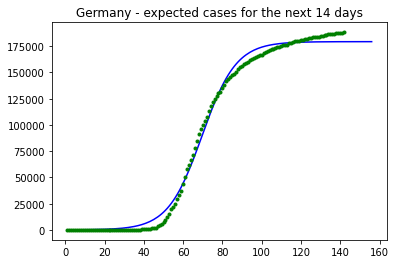

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot Chart
plt.figure
plt.plot(x_array, logistic(x_array, *poptL), 'b-',label='expected log')
plt.plot(df_country_exp['day'], df_country_exp['cases'] ,".", color = 'green',label=df_country['cases']  )

plt.title(''.join(country_list) + ' - expected cases'  +' for the next ' + str(expdays) + ' days' )

